# Classify Handwritten-Digits with Keras
[Jian Tao](https://coehpc.engr.tamu.edu/people/jian-tao/), Texas A&M University

Dec 1, 2020

1. Train a model with at least 90% validation accuracy.
2. Train with "Dense" layers only.
3. Explain the reason why you choose to design your neural network that way.

In [ ]:
%load_ext tensorboard
from tensorflow.keras import utils, callbacks, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as plt
import numpy as np
import os, datetime

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


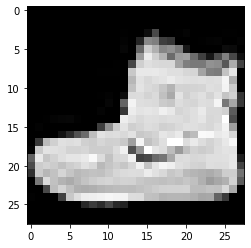

In [ ]:
# show the first image in the data set
plt.imshow(X_train[0], cmap="gray") # Import the image
plt.show() # Plot the image

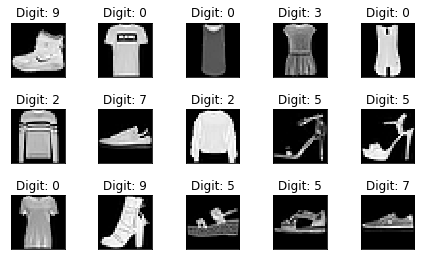

In [ ]:
# show the first 15 images in the data set.
fig = plt.figure()
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])

In [ ]:
# Normalize the train dataset
X_train = utils.normalize(X_train, axis=1)
# Normalize the test dataset
X_test = utils.normalize(X_test, axis=1)

In [ ]:
#Build the model object
model = Sequential()
# Add the Flatten Layer
model.add(Flatten())
# Build the input and the hidden layers
model.add(Dense(126, activation='relu'))
model.add(Dense(134, activation='relu'))
# Build the output layer
model.add(Dense(10.5, activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# This is needed for loading Tensorboard.
tensorboard_callback = callbacks.TensorBoard(log_dir="logs", histogram_freq=1)

In [ ]:
model.fit(x=X_train, y=y_train, epochs=10, 
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback]) # Start training process

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4828 - accuracy: 0.8226 - val_loss: 0.3999 - val_accuracy: 0.8550
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3543 - accuracy: 0.8680 - val_loss: 0.3806 - val_accuracy: 0.8597
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3196 - accuracy: 0.8801 - val_loss: 0.3559 - val_accuracy: 0.8712
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2959 - accuracy: 0.8884 - val_loss: 0.3497 - val_accuracy: 0.8709
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2746 - accuracy: 0.8954 - val_loss: 0.3612 - val_accuracy: 0.8709
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2611 - accuracy: 0.9008 - val_loss: 0.3352 - val_accuracy: 0.8782
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2491 - accuracy: 0.9053 - val_loss: 0.3530 - val_accuracy:

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 126)               98910     
_________________________________________________________________
dense_7 (Dense)              (None, 134)               17018     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1350      
Total params: 117,278
Trainable params: 117,278
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Evaluate the model performance
test_loss, test_acc = model.evaluate(x=X_test, y=y_test, verbose=0)
# Print out the model accuracy 
print('\nTest accuracy:', test_acc)


Test accuracy: 0.8784999847412109


In [ ]:
# Save model into MNIST.h5 and we are all done with the training now.
model.save('MNIST.h5')

In [ ]:
model = models.load_model('MNIST.h5')

In [ ]:
predictions = model.predict(X_test)

In [ ]:
# function that plots a single image.
def test_digit(i):
    plt.imshow(X_test[i], interpolation='none')
    plt.title("digit:%d   prediction: %d" %(y_test[i], np.argmax(predictions[i])))
    plt.xticks([])
    plt.yticks([])

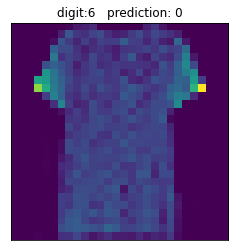

In [ ]:
# let's output the images which were not predicted correctly.
for i in range(len(X_test)):
    if np.argmax(predictions[i]) != y_test[i]:
        test_digit(i)

In [ ]:
#i kept the numbers this way because it was getting the highest accuracy, however
#it seems like even running with the same numbers i am getting different results out sometimes 
#the image with these numbers has changed from a long sleeve with a heart to a short sleeve t but we can tell that it is clothing 
